# **Penney Ante Probabilities**
## Drew Honson


# The Penney Ante is a game of chance based on coin flips. One player picks a triplet of flips (e.g. 'heads, tails, heads') then a second player picks a different triplet. The players then flip a coin until one of the chosen triplets occurs. For the first three flips, all triplets are equally probable at a 12.5% chance for each triplet. Afterwards, however, some triplets are better than others.

# **Player 1 : HHH**
# **Player 2 : THH**

# **First three flips: HHT**
   ## No one can win on the next flip (only possibilities are HTH and HTT)
   ## But, Player 2 has a 25% chance of winning two flips from now (50% chance of HTH, then 50% chance of THH)
   ## Player 1 cannot win in the next two flips, so Player 2 has the advantage

## If you look at all eight possibilities for the first three flips, and the resulting probabilities of the subsequent flips, some choices are better than others. These relations can be calculated mathematically, but Python alllows us to do it experimentally too.

## But first, a sanity check. Let's check that every triplet is equally likely if you don't account for the order in which they occur. We'll create a program that flips a coin a million times then plots the frequency of each triplet.


In [1]:
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")
#This program will run x number of flips and show a histogram of triplet occurrences
def game(x):
    '''Make a histogram of triplet occurrences for x number of coin flips'''
    #Load an empty list and the heads/tails options
    pa = []
    options = ['H','T']
    
    #Append random heads and tails options to pa for the number of flips specified.
    #The +1 in the range accounts for Python's numbering system.
    
    for i in range(x):
        pa.append(random.choice(options))
        
    #Join pa into a string
    pas = ''.join(pa)
    
    #Split the string into triplets for each flip
    triplet = []
    for j in range(len(pas)-2):
        triplet.append(pas[j:j+3])
        
    #Count occurrences of each triplet in the list, and turn it into a dictionary.
    unique_triplets = ['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']
    triplet_count = []
    for k in unique_triplets:
        if k in triplet:
            triplet_count.append(triplet.count(k))
    tripdict = dict(zip(unique_triplets, triplet_count))
    
    #Plot a histogram of triplet usage along with the dictionary of values
    plt.bar(range(len(tripdict)), tripdict.values(), align='center')
    plt.xticks(range(len(tripdict)), tripdict.keys(), rotation='45')
    plt.title("Histogram of Triplet Usage")
    plt.ylabel("Triplet Count")
    plt.show()
    return tripdict

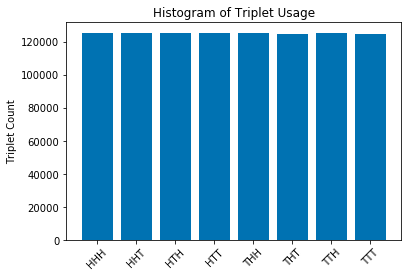

{'HHH': 125345,
 'HHT': 125087,
 'HTH': 124902,
 'HTT': 125000,
 'THH': 125086,
 'THT': 124816,
 'TTH': 125000,
 'TTT': 124762}

In [2]:
game(1000000)

# Great! Now we can see that over a million flips, the occurrence of each triplet is roughly the same, as we'd expect. But now, what if we account for which triplets arise first? Let's run a hundred thousand games of a thousand flips each and see if any triplets come out as inherently better than others.

In [3]:
def first(x):
    '''Finds the first occurrence of each triplet over the course of x games of 1000 flips'''
    import random
    import numpy as np
    import pandas as pd
    % matplotlib inline
    first_unique = [] #This list stores the first occurrence of each triplet for each run as a list of lists
    for _ in range(x): #Input to the "first" program determines number of times the loop runs
        pa = []
        triplet = []
        unique_triplet = ['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']
        options = ['H','T']
        #Run 1000 flips and covert to a string
        for i in range(1000):
            pa.append(random.choice(options))
        pas = ''.join(pa)
        #Convert the string into a list of triplets
        for j in range(len(pas)-2):
            triplet.append(pas[j:j+3])
        #Append the first occurrence of each triplet for one run to a list
        unique_list = []
        for i in unique_triplet:
            unique_list.append(triplet.index(i)+1)
        #Store the results for each run to a list of lists outside the loop
        #The program breaks somewhere around here if one triplet is not represented in one of the runs
        #This happens if you run more than a million or so games
        first_unique.append(unique_list)
    #Convert first_unique to a Pandas array and label the columns with the corresponding triplet
    first_panda = pd.DataFrame(np.array(first_unique), columns = unique_triplet)
    #Print a boxplot
    first_panda.boxplot(figsize = (10,100))
    #Print the means of the first occurrence of each triplet
    return first_panda.mean()


HHH    12.00858
HHT     6.01618
HTH     7.97565
HTT     5.99179
THH     5.99158
THT     8.00433
TTH     5.99057
TTT    11.95402
dtype: float64

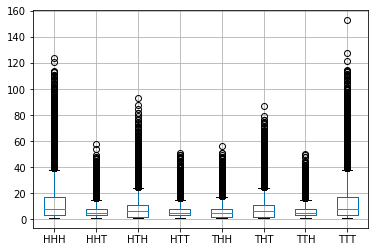

In [4]:
first(100000)

# Now we can see that some triplets are indeed better than others. HHH and TTT are the worst because each one can only be preceded by one triplet: THH for HHH, and HTT for TTT. In contrast, HTH is among the best because it can be preceded by two triplets: THT and HHT. The smaller differences among triplets can be accounted for by the relative probabilities of each triplet that precedes it. This quickly turns into complicated math, but Python lets us run it experimentally without needing to calculate all the theoretical probabilities.

# Now it's time to play for yourselves! Choose your triplet wisely!

In [5]:
import random
#Players pick their triplets
player1 = input("Player 1 Triplet:    ").upper()
player2 = input("Player 2 Triplet:    ").upper()
unique_triplet = ['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']
#Check that players picked different triplets and that the triplets picked are valid
if player1 == player2:
    raise Exception('Players 1 and 2 must pick different triplets')
elif player1 not in unique_triplet:
    raise Exception('You must pick a heads and tails triplet. The valid triplets are ' + str(unique_triplet) + '.')
elif player2 not in unique_triplet:
    raise Exception('You must pick a heads and tails triplet. The valid triplets are ' + str(unique_triplet) + '.')
#If everything looks good, run the game
else:
    palist = []
    #Patrip must be loaded with an empty figure so that patrip[-1] is within the index range.
    patrip = ['blank']
    options = ['H', 'T']
    #While loop runs as long as the last value of patrip is not either player's choice
    while patrip[-1] != player1 and patrip[-1] != player2:
        palist.append(random.choice(options))
        pastring = ''.join(palist)
        for j in range(len(pastring)-2):
            patrip.append(pastring[j:j+3])
    #Conditionals check and print who wins the game and how many flips it took
    if patrip[-1] == player1:
        print('Player 1 wins after ' + str(len(pastring)) + ' flips!')
    elif patrip[-1] == player2:
        print('Player 2 wins after ' + str(len(pastring)) + ' flips!')

Player 1 Triplet:    HHH
Player 2 Triplet:    THH
Player 2 wins after 13 flips!
